## Algumas hipóteses sobre o negócio

**H1**: Imóveis que possuem vista para água, são 3x mais caros, na média.

**H2**: Imóveis com data de construção menor que 1955, são na média 50% mais baratos.

**H3**: Imóveis sem porão possuem área total (sqft_lot) 40% maior do que os imóveis com porão.

**H4**: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%

**H5**: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%




Os dados para análise são encontrados em: https://www.kaggle.com/harlfoxem/housesalesprediction/version/1?select=kc_house_data.csv

In [114]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#para ter 3 casas depois da vírgula
pd.set_option('display.float_format',lambda x: '%.3f' % x)

In [2]:
#load data
data = data = pd.read_csv('datasets/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


### H1: Imóveis que possuem vista para água, são 3x mais caros, na média.

- Pegar todos os imóveis que não tem vista para a água e fazer a média de preço; 
- Depois pegar todos os imóveis com vista e também fazer a média do preço, essa média tem que ser 30% maior que a outra média para a hipótese ser verdadeira. 

In [31]:
#agrupando os dados do preço em relação a vista para a água e fazendo a média dos preços de cada tipo
waterfront_mean = data[['waterfront','price']].groupby('waterfront').mean().reset_index()

#renomeando as colunas 
waterfront_mean.rename(columns = {'price': 'price_mean'}, inplace = True)

waterfront_mean

,waterfront,price_mean
0,0,531563.600
1,1,1661876.025


In [339]:
print(f'A média de preços dos imóveis SEM VISTA para o água é de aproximadamente U${waterfront_mean.iloc[0,1]:.2f},\nE a média de preços dos imóveis COM VISTA para a água é de U${waterfront_mean.iloc[1,1]:.2f}.\n\nDessa forma, nota-se que a Hipótese 1 é VERDADEIRA e os imóveis com vista para o água são cerca de 3x mais caros.')

A média de preços dos imóveis SEM VISTA para o água é de aproximadamente U$531563.60,
E a média de preços dos imóveis COM VISTA para a água é de U$1661876.02.

Dessa forma, nota-se que a Hipótese 1 é VERDADEIRA e os imóveis com vista para o água são cerca de 3x mais caros.


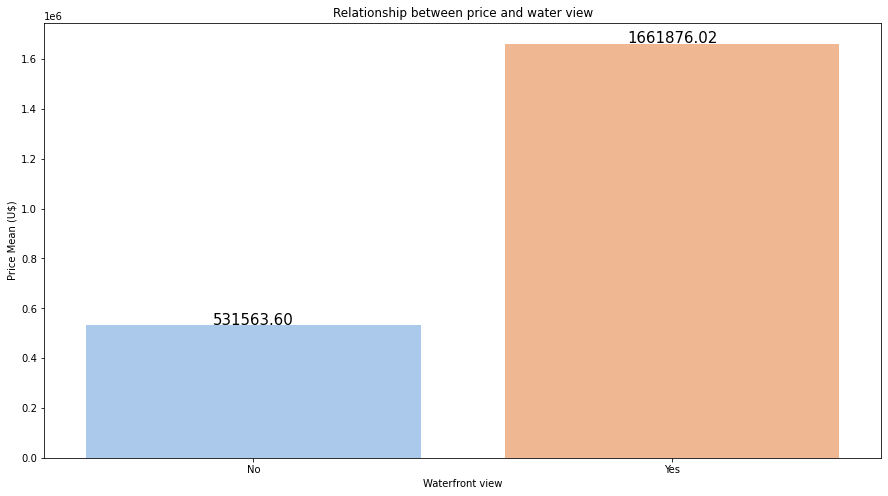

In [262]:
#criação do gráfico
plt.figure(figsize = (15,8))
plot = sns.barplot(data=waterfront_mean, x='waterfront', y='price_mean',palette="pastel")

plt.title("Relationship between price and water view")
plt.xlabel("Waterfront view")
plt.ylabel("Price Mean (U$)")
plt.xticks(waterfront_mean['waterfront'],['No','Yes'])

#criação dos valores acima das barras
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  fontsize=15,
                  xytext=(0, 1),
                  textcoords='offset points')

#salvando o gráfico como png
plt.savefig('H1.png', format='png')

### H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

- Separa todos os imóveis com data de construção maior que 1955 e calcula a média de preço deles. 
- Depois pega todos os imóveis com data de construção menor que 1955 e também calcula a média de preço, essa média tem que ser 50% menor que a outra média para a hipótese ser verdadeira. 

In [126]:
#pegando os imóveis que tem data de construção maior do que 1955
above_yr = data[data['yr_built'] > 1955][['id','yr_built','price']].sort_values('yr_built').reset_index()

#pegando os imóveis que tem data de construção menor do que 1955
under_yr = data[data['yr_built'] < 1955][['id','yr_built','price']].sort_values('yr_built').reset_index()

In [127]:
#calculando a média dos preços dos df
under_mean = under_yr['price'].mean()

above_mean = above_yr['price'].mean()

print(f'Média de preço:\nyr_built > 1955: ${above_mean:.2f}\nyr_built < 1955: ${under_mean:.2f}')

Média de preço:
yr_built > 1955: $542917.16
yr_built < 1955: $537050.91


Nota-se que a hipótese de que Imóveis com data de construção menor que 1955 são na média 50% mais baratos é FALSA, visto que foi constatado que os valores médios dos preços são praticamente os mesmos, variando cerca de 1%. 

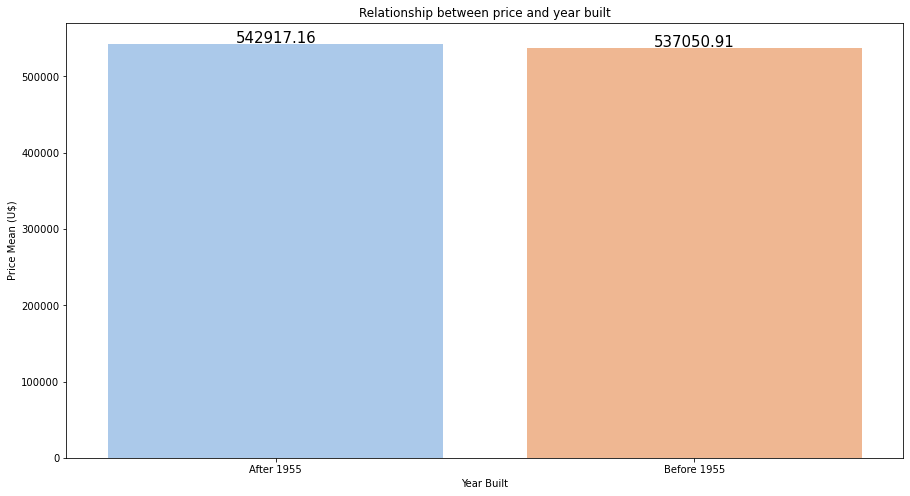

In [263]:
#criação do gráfico
plt.figure(figsize = (15,8))

x = ['After 1955','Before 1955']
y = [above_mean, under_mean]
plot = sns.barplot(data=data, x=x, y=y ,palette="pastel")

plt.title("Relationship between price and year built")
plt.xlabel("Year Built")
plt.ylabel("Price Mean (U$)")

#criação dos valores acima das barras
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  fontsize=15,
                  xytext=(0, 1),
                  textcoords='offset points')

#salvando o gráfico como png
plt.savefig('H2.png', format='png')

### H3: Imóveis sem porão possuem área total (sqft_lot) 40% maior do que os imóveis com porão.

- Separa todos os imóveis com porão e calcula a média da área total. 
- Depois pega todos os imóveis sem porão e também calcula a média da área, essa média tem que ser 40% maior que a outra média para a hipótese ser verdadeira. 

In [189]:
#pegando os imóveis que tem o sqft_basement nulo e fazendo a média do valor do sqft_lot
without_basement = data[data['sqft_basement']==0]['sqft_lot'].mean()

#pegando os imóveis que tem o sqft_basement diferente de zero e fazendo a média do valor do sqft_lot
with_basement = data[data['sqft_basement']!=0]['sqft_lot'].mean()

print(f'Média de sqft do terreno:\nCom porão: {with_basement:.3f}\nSem porão: {without_basement:.3f}')

Média de sqft do terreno:
Com porão: 13286.295
Sem porão: 16284.177


Nota-se que a hipótese de que Imóveis sem porão possuem área total 40% maior do que os imóveis com porão é FALSA, visto que a área total dos imóveis sem porão é cerca de 20% maior dos que os imóveis com porão. 

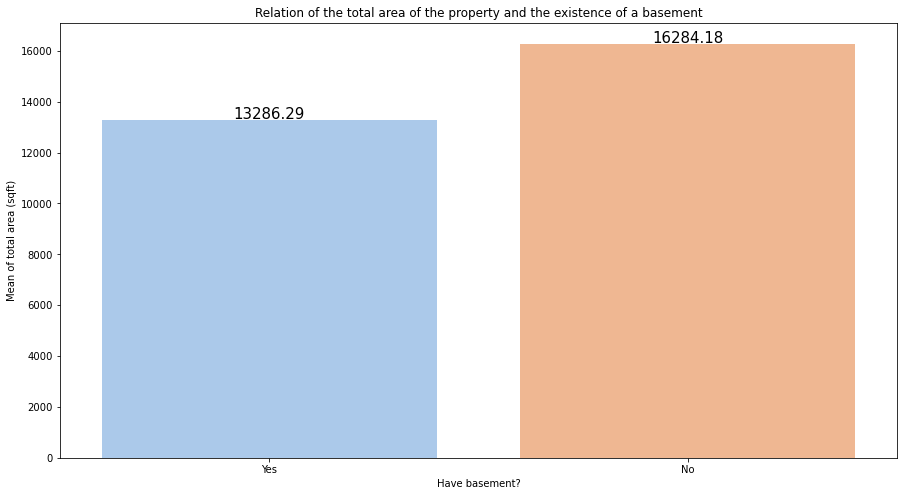

In [264]:
#criação do gráfico
plt.figure(figsize = (15,8))

x = ['Yes','No']
y = [with_basement, without_basement]
plot = sns.barplot(data=data, x=x, y=y ,palette="pastel")

plt.title("Relation of the total area of the property and the existence of a basement")
plt.xlabel("Have basement?")
plt.ylabel("Mean of total area (sqft)")

#criação dos valores acima das barras
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  fontsize=15,
                  xytext=(0, 1),
                  textcoords='offset points')

#salvando o gráfico como png
plt.savefig('H3.png', format='png')

### H4: O crescimento do preço dos imóveis YoY (Year over Year - comparação ano a ano) é de 10%.

- Olha o preço médio de um mês em um ano em comparação do preço médio do mesmo mês no outro ano, se a diferença for de 10% então a hipótese é verdadeira.

Os imóveis disponíveis no Dataset foram adiquiridos entre maio de 2014 e maio de 2015. Dessa forma, será feita a comparação dos valores referentes a maio/2014 com maio/2015. 

In [140]:
#transformar a coluna 'date' para o tipo datetime
data['date'] = pd.to_datetime(data['date'])

#criando uma nova coluna chamada 'month' e 'year' contendo somente os respectivos mêses e anos da coluna 'date'
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,0,1955,0,98178,47.511,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,400,1951,1991,98125,47.721,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,0,1933,0,98028,47.738,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,910,1965,0,98136,47.521,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,0,1987,0,98074,47.617,-122.045,1800,7503,2,2015


In [141]:
#agrupando os dados do preço em relação ao ano e ao mês
df = data[['price','year','month']].groupby(['year','month']).mean()

#renomeando a coluna de preço
df.rename(columns = {'price':'price_mean'}, inplace = True)
df

price_mean
year month            
2014 5      548080.277
     6      558002.200
     7      544788.764
     8      536445.277
     9      529253.822
     10     539026.972
     11     521961.009
     12     524461.867
2015 1      525870.890
     2      507851.371
     3      543977.187
     4      561837.775
     5      558126.811

In [142]:
print(f'Média do preço dos imóveis por ano:\nMaio/2014: ${df.iloc[0,0]:.2f}\nMaio/2015: ${df.iloc[-1,0]:.2f}')

Média do preço dos imóveis por ano:
Maio/2014: $548080.28
Maio/2015: $558126.81


Nota-se que a hipótese de que O crescimento do preço dos imóveis YoY (Year over Year - comparação ano a ano) é de 10% é FALSA, visto que os valores médios dos preços entre os dois anos variam cerca de 2%. 

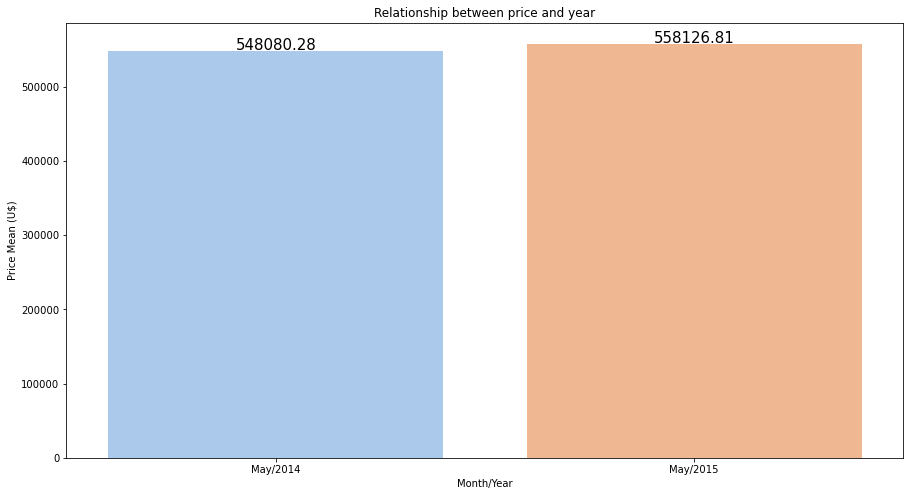

In [265]:
#criação do gráfico
plt.figure(figsize = (15,8))

x = ['May/2014','May/2015']
y = [df.iloc[0,0], df.iloc[-1,0]]
plot = sns.barplot(data=data, x=x, y=y ,palette="pastel")

plt.title("Relationship between price and year")
plt.xlabel("Month/Year")
plt.ylabel("Price Mean (U$)")

#criação dos valores acima das barras
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  fontsize=15,
                  xytext=(0, 1),
                  textcoords='offset points')

#salvando o gráfico como png
plt.savefig('H4.png', format='png')

### H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month - comparação mês a mês ) de 15%.

- Separar os imóveis com 3 banheiros e olhar o preço médio em janeiro de um ano em comparação ao preço médio de fevereiro do mesmo ano, se a diferença for de 15% então a hipótese é verdadeira.
- Fazer um gráfico comparando esse crescimento nos meses subsequentes. Por exemplo, calcular do mês de jan e fev, mar e abril, maio junho e fazer um gráfico.

In [148]:
#transformar a coluna 'date' para o tipo datetime
data['date'] = pd.to_datetime(data['date'])

#criando uma nova coluna chamada 'month' e 'year' contendo somente os respectivos mêses e anos da coluna 'date'
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [149]:
#dataframe com os imóveis com três banheiros
data_three_bath = data[data['bathrooms']==3].reset_index()

In [185]:
#agrupando os dados do preço em relação ao ano e ao mês
df2 = data_three_bath[['price','year','month']].groupby(['year','month']).mean()

#renomeando a coluna de preço
df2.rename(columns = {'price':'price_mean'}, inplace = True)
df2

price_mean
year month            
2014 5      690080.714
     6      775057.564
     7      741405.043
     8      737576.562
     9      645246.887
     10     645523.015
     11     679910.465
     12     728341.188
2015 1      672923.171
     2      696714.422
     3      768495.096
     4      709751.988
     5      686351.950

In [186]:
print('Média do preço dos imóveis por mês no ano:\n')
for i in range(len(df2)):
    print(f'Ano:{df2.index[i][0]}; Mês:{df2.index[i][1]} -> ${df2.iloc[i,0]:.2f}')

Média do preço dos imóveis por mês no ano:

Ano:2014; Mês:5 -> $690080.71
Ano:2014; Mês:6 -> $775057.56
Ano:2014; Mês:7 -> $741405.04
Ano:2014; Mês:8 -> $737576.56
Ano:2014; Mês:9 -> $645246.89
Ano:2014; Mês:10 -> $645523.02
Ano:2014; Mês:11 -> $679910.47
Ano:2014; Mês:12 -> $728341.19
Ano:2015; Mês:1 -> $672923.17
Ano:2015; Mês:2 -> $696714.42
Ano:2015; Mês:3 -> $768495.10
Ano:2015; Mês:4 -> $709751.99
Ano:2015; Mês:5 -> $686351.95


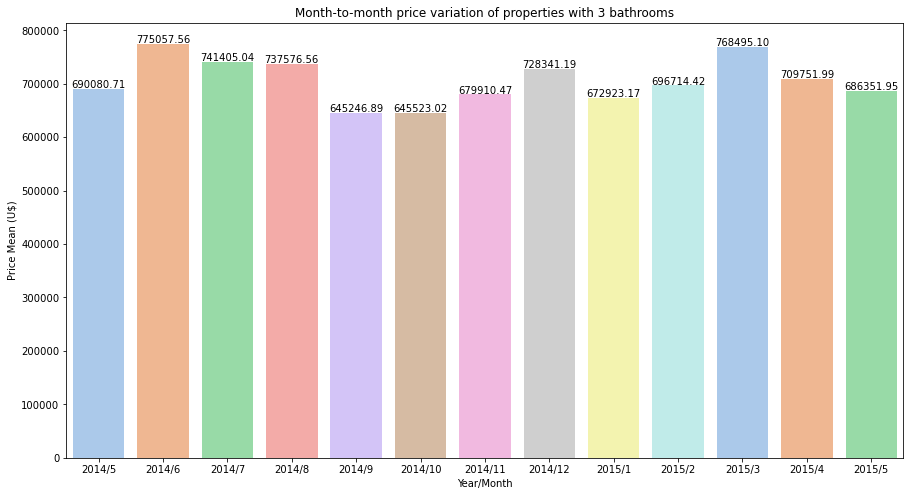

In [338]:
#criação do gráfico
plt.figure(figsize = (15,8))

x = list(range(0,13))
y = df2['price_mean']
plot = sns.barplot(data=data, x=x, y=y ,palette="pastel")

plt.title("Month-to-month price variation of properties with 3 bathrooms")
plt.xlabel("Year/Month")
plt.ylabel("Price Mean (U$)")
plt.xticks(x,['2014/5','2014/6','2014/7','2014/8','2014/9','2014/10','2014/11','2014/12','2015/1','2015/2','2015/3','2015/4','2015/5'])

#criação dos valores acima das barras
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  xytext=(0, 1),
                  textcoords='offset points')
    
#salvando o gráfico como png
plt.savefig('H5.1.png', format='png')

In [279]:
#calculo da diferença entre os preços de cada mês e respectivo porcentagem
lista = []
porcen = []

for i in range(len(df2)-1):
    dif = df2.iloc[i+1,0] - df2.iloc[i,0]
    lista.append(dif)

    x= (dif*100)/df2.iloc[i,0]
    porcen.append(x)

print(porcen)

[12.314045017879868, -4.341938302916555, -0.5163817530009102, -12.517978454074905, 0.042794135546576184, 5.327067998759523, 7.123102947891563, -7.60879896941056, 3.5355078447730177, 10.302739780048496, -7.643914478120775, -3.296931692079555]


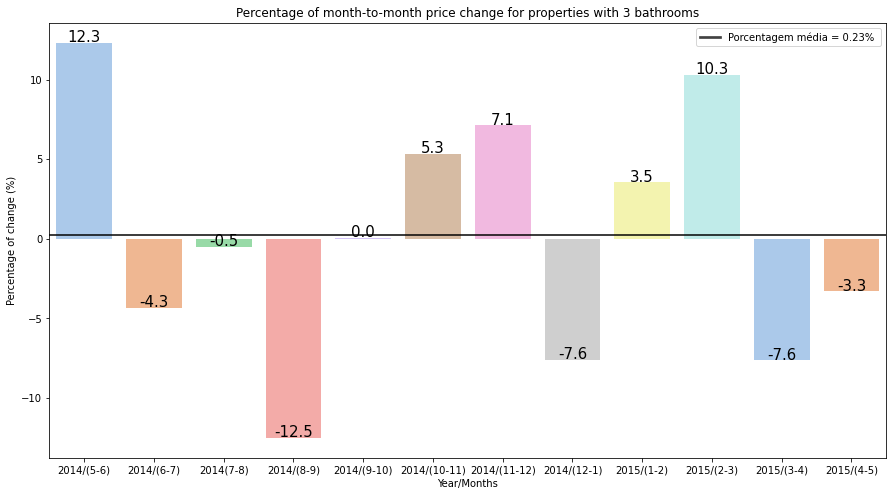

In [337]:
#criação do gráfico
plt.figure(figsize = (15,8))

x = list(range(0,12))
y = porcen
plot = sns.barplot(data= data, x=x, y=y ,palette="pastel")
#plot = plt.bar(x=x,height=y)

plt.title("Percentage of month-to-month price change for properties with 3 bathrooms")
plt.xlabel("Year/Months")
plt.ylabel("Percentage of change (%)")
#plt.plot(np.mean(porcen))
plt.xticks(x,['2014/(5-6)','2014/(6-7)','2014(7-8)','2014/(8-9)','2014/(9-10)','2014/(10-11)','2014/(11-12)','2014/(12-1)','2015/(1-2)','2015/(2-3)','2015/(3-4)','2015/(4-5)'])

plt.axhline(y=np.mean(porcen), color = 'black')
plt.legend(labels=["Porcentagem média = 0.23% "])

#criação dos valores acima das barras
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.1f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  fontsize=15,
                  ha='center',
                  xytext=(0, 1),
                  textcoords='offset points')

#salvando o gráfico como png
plt.savefig('H5.2.png', format='png')

 Nota-se que o crescimento do preço dos imóveis varia de mês em mês. Podendo chegar a um acréscimo de cerca de 12% assim como uma diminuição de 12%. Dessa forma, percebe-se que a hipótese de que os Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month - comparação mês a mês ) de 15% é FALSA, sendo que a porcentagem média de acréscimo durante o período contabilizado é de cerca de 0.23%.